In [14]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [15]:
def function(x,y):
    return 2*x**3+3*y**2

def function_grad(x,y):
    return np.array([6*x**2, 6*y])

In [16]:
# Correction : momentum was added into algorithm 

def grad_descent_mult(init,learn_rate,grad_vector):
    x_prev = init
    epsilon = 1e-5
    momentum = 0.3
    change = 0
    iteration = 1
    parameter_x = []
    parameter_y = []
    parameter_x.append(x_prev[0])
    parameter_y.append([x_prev[1]])
    euc_dis = []
    new_change = learn_rate*grad_vector(x_prev[0],x_prev[1])+change*momentum
    x_next = x_prev - new_change
    parameter_x = np.append(parameter_x, x_next[0])
    parameter_y = np.append(parameter_y, x_next[1])
    change = new_change
    while np.linalg.norm(x_next - x_prev) > epsilon:
        euc_dis = np.append(euc_dis, np.linalg.norm(x_next - x_prev))
        x_prev = x_next
        new_change = learn_rate*grad_vector(x_prev[0],x_prev[1])+change*momentum
        x_next = x_prev - new_change
        iteration += 1
        parameter_x = np.append(parameter_x, x_next[0])
        parameter_y = np.append(parameter_y, x_next[1])
        change = new_change
    return (x_next, iteration, parameter_x, parameter_y, euc_dis)

In [17]:
#adam implementation

In [18]:
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-5
def adam_mult(init,learn_rate,grad_vector):
    x_prev = init
    m_t = 0 
    v_t = 0 
    iteration = 1
    parameter_x = []
    parameter_y = []
    parameter_x.append(x_prev[0])
    parameter_y.append(x_prev[1])
    euc_dist = []
    g_t = grad_vector(x_prev[0],x_prev[1])
    m_t = (1-beta_1)*g_t
    v_t = (1-beta_2)*(g_t*g_t)
    m_cap_x = m_t[0]/(1-(beta_1**iteration))
    m_cap_y = m_t[1]/(1-(beta_1**iteration))
    m_cap = np.array([m_cap_x,m_cap_y])
    v_cap_x = v_t[0]/(1-(beta_2**iteration))
    v_cap_y = v_t[1]/(1-(beta_2**iteration))
    v_cap = np.array([v_cap_x,v_cap_y])
    x_next = x_prev - learn_rate*m_cap/(np.sqrt(v_cap)+epsilon)
    parameter_x = np.append(parameter_x, x_next[0])
    parameter_y = np.append(parameter_y, x_next[1])
    
    while np.linalg.norm(x_next - x_prev) > epsilon:

        euc_dist = np.append(euc_dist, np.linalg.norm(x_next - x_prev))
        x_prev = x_next
        g_t = grad_vector(x_prev[0],x_prev[1])
        m_t = beta_1*m_t + (1-beta_1)*g_t
        v_t = beta_2*v_t + (1-beta_2)*(g_t*g_t)
        m_cap_x = m_t[0]/(1-(beta_1**iteration))
        m_cap_y = m_t[1]/(1-(beta_1**iteration))
        m_cap = np.array([m_cap_x,m_cap_y])
        v_cap_x = v_t[0]/(1-(beta_2**iteration))
        v_cap_y = v_t[1]/(1-(beta_2**iteration))
        v_cap = np.array([v_cap_x,v_cap_y])
        x_next = x_prev - learn_rate*m_cap/(np.sqrt(v_cap)+epsilon)
        iteration += 1
        parameter_x = np.append(parameter_x, x_next[0])
        parameter_y = np.append(parameter_y, x_next[1])
    return (x_next, iteration, parameter_x, parameter_y, euc_dist)
    

/var/folders/6m/1kyq0wq56bx12x382j8hdw1h0000gq/T/ipykernel_30506/2769143387.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


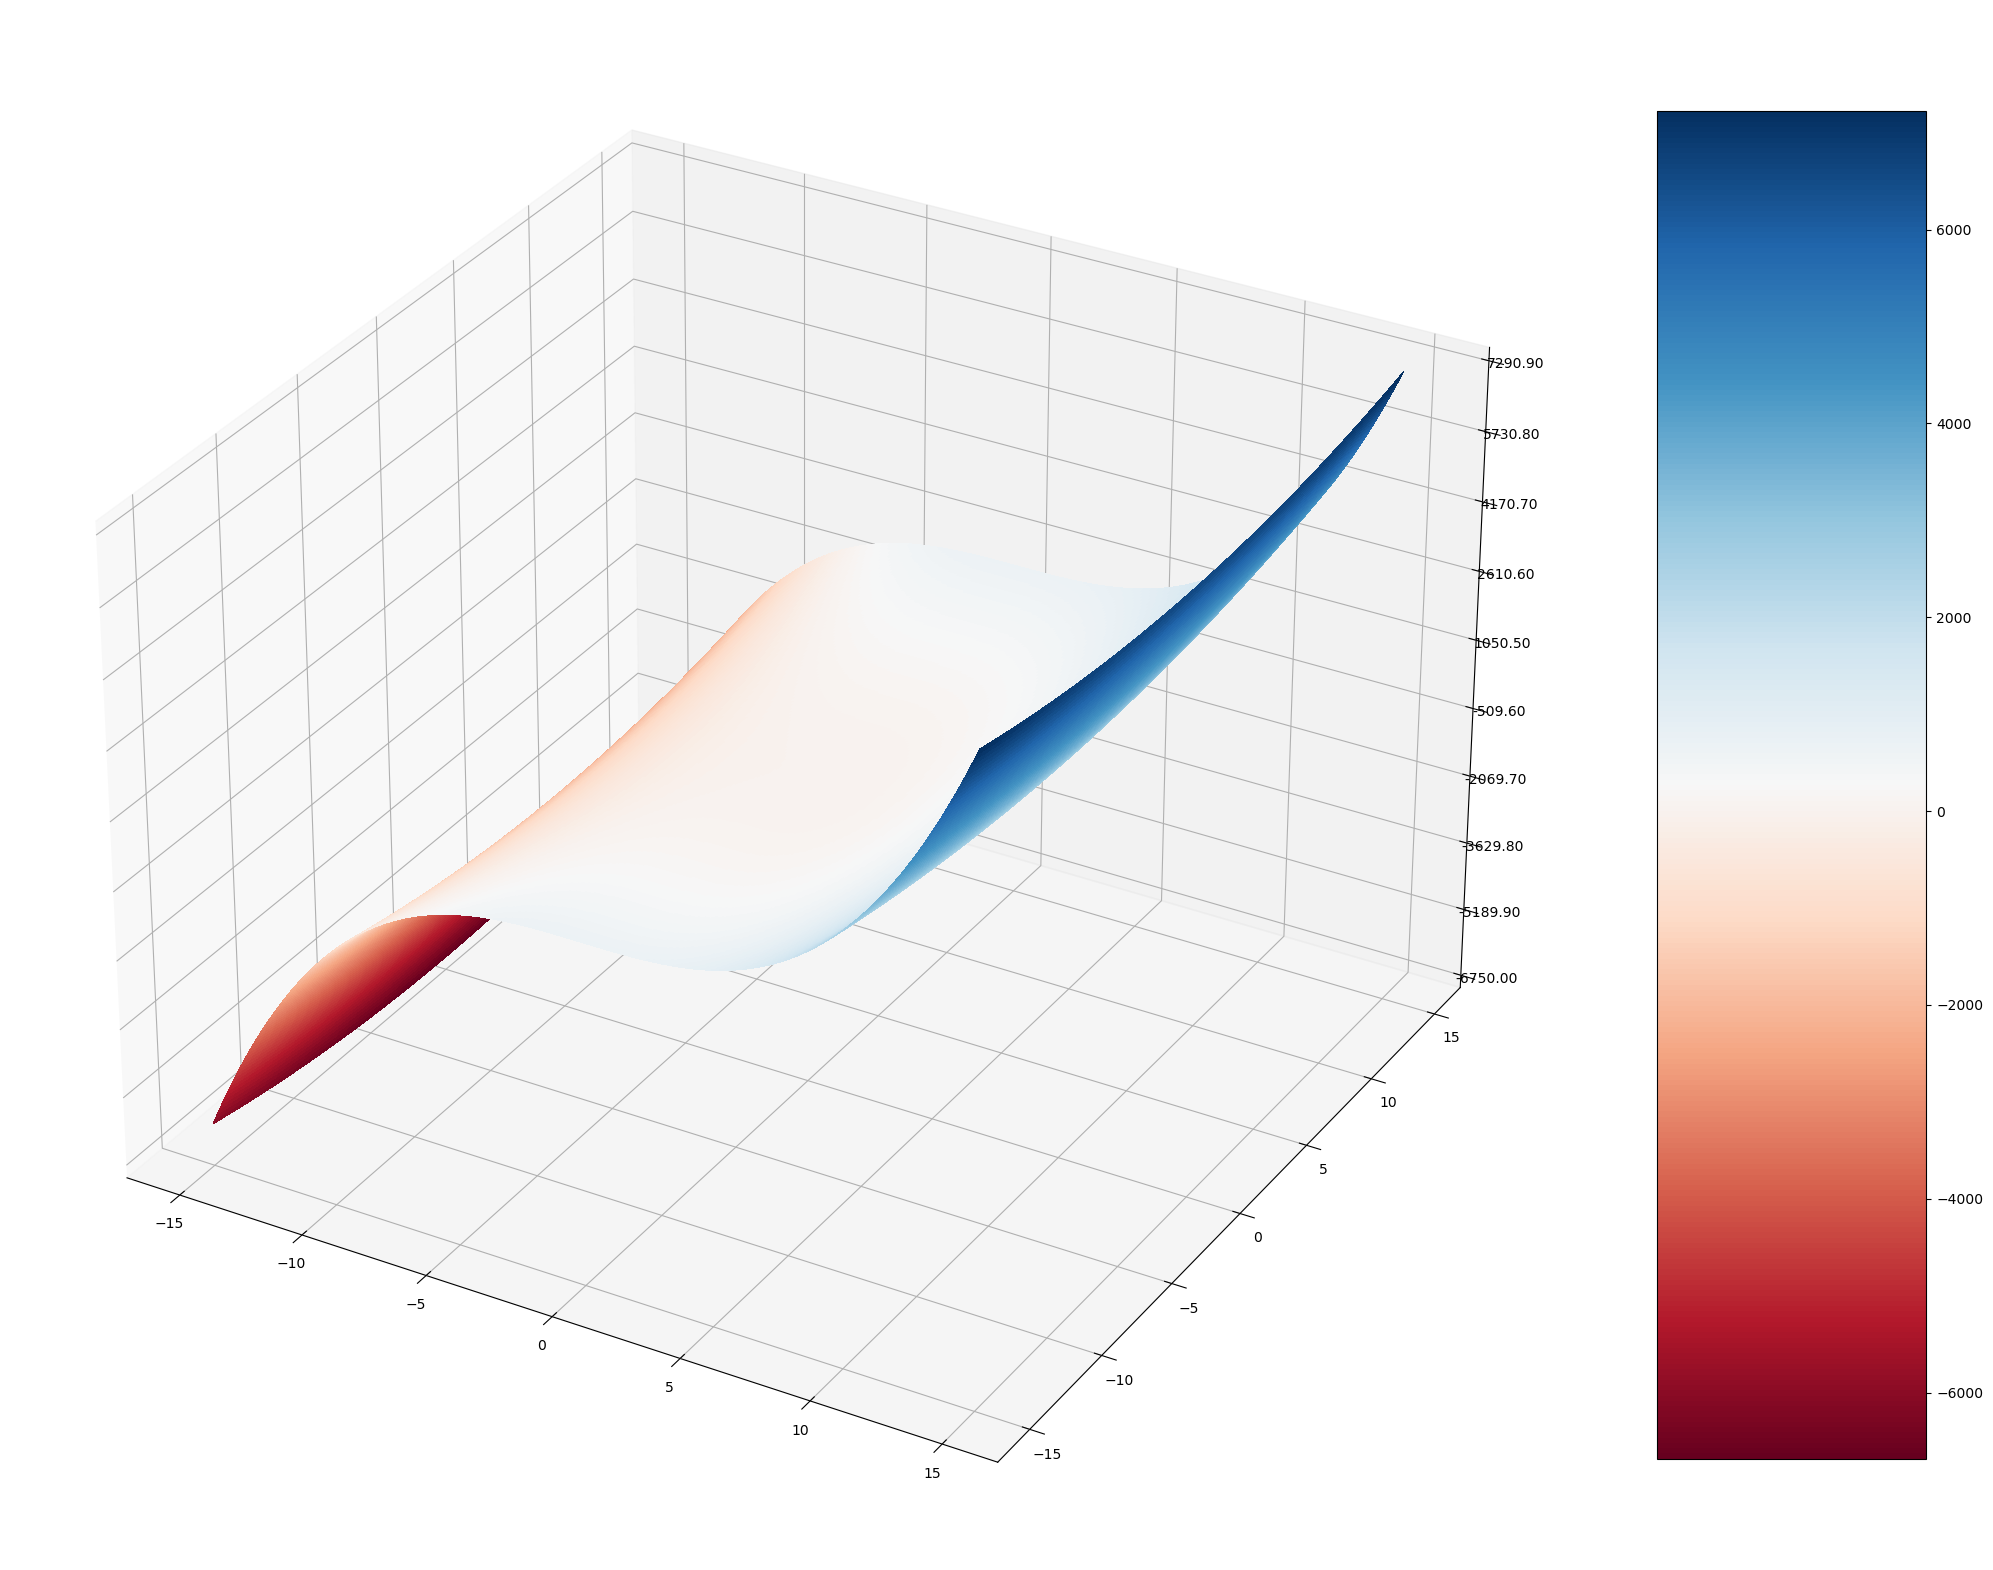

In [19]:
X, Y = np.meshgrid(np.arange(-15, 15, 0.1), np.arange(-15, 15, 0.1))
Z = function(X,Y)
fig = plt.figure(figsize = (25, 25))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, function(X,Y), rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

In [20]:
start = np.array([5,10])
final_point, iteration, x_sequence, y_sequence, euc_distances = grad_descent_mult(start, 0.01, function_grad)
print("gradient descent :")
print('minimum: ', final_point)
print('number: ', iteration)

gradient descent :
minimum:  [1.07785841e-02 3.81718867e-43]
number:  1067


gradient descent :


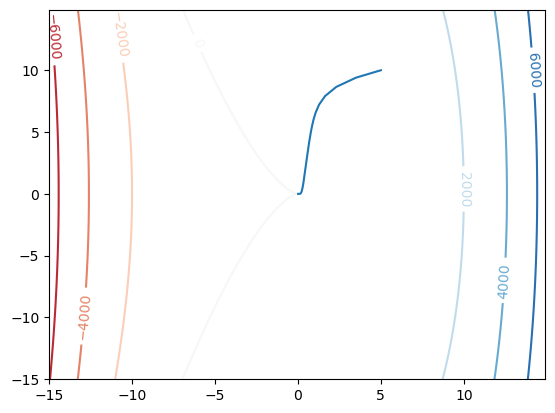

In [21]:
print("gradient descent :")

CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
plt.clabel(CS)
plt.plot(x_sequence,y_sequence)

gradient descent euclidean distances :


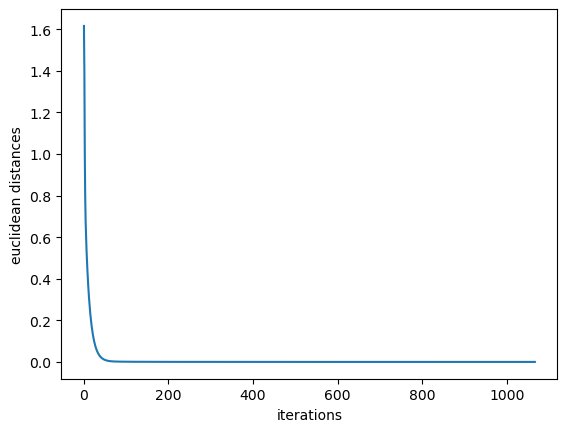

In [22]:
size = euc_distances.size
number = np.linspace(1,size,size)
plt.xlabel('iterations')
plt.ylabel('euclidean distances')
print("gradient descent euclidean distances :")
plt.plot( number, euc_distances)

In [23]:
start_point = np.array([5,10])
final_point, iteration, x_sequence, y_sequence, euc_distances = adam_mult(start_point, 0.01, function_grad)
print("adam :")
print('minimum: ', final_point)
print('Iterations: ', iteration)

adam :
minimum:  [ 1.89287827e-02 -1.63291118e-37]
Iterations:  6528


adam :


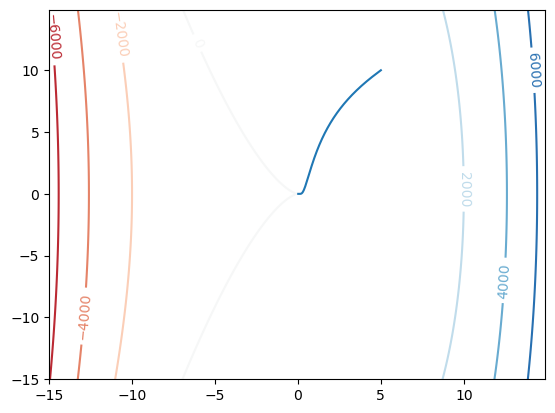

In [24]:
print("adam :")

X, Y = np.meshgrid(np.arange(-15, 15, 0.1), np.arange(-15, 15, 0.1))
Z = function(X,Y)
CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(x_sequence,y_sequence)


adam euclidean distances :


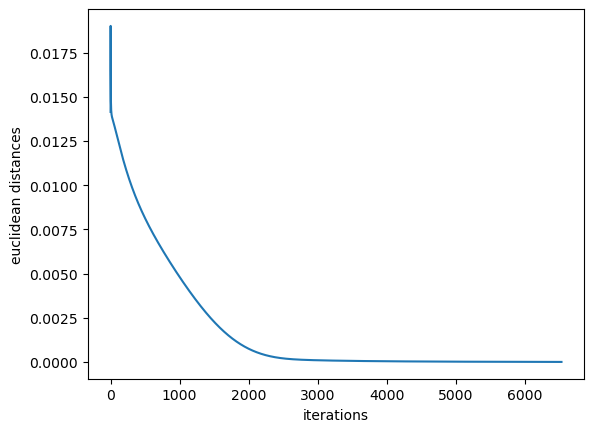

In [25]:
print("adam euclidean distances :")
plt.xlabel('iterations')
plt.ylabel('euclidean distances')
plt.plot(np.linspace(1, euc_distances.size, euc_distances.size), euc_distances)

In [26]:
# from both graphs,we can see the routh how they get to minimum points is almost the same , but there is intense curve 
# in gradient descent,eventually got to almost same points . The difference is gradient descent has a dramatic change 
# of euclidean distance due to, and it takes 2000 iterations for adam optimizaton to stop change dynamically 
